In [73]:
# Used to solve classification problem
#y = mx+c
#log = exp(y)/{1+exp(y)}
#if prob_fraud>0.5,1,0 If probabilittyof fraud greater than 00.5 thne True else false
#Confusion MAtrix
#True Posiitive    Both actual and Predicted +ve(True)
#True Negative     Both actual and predicted -ve(False)
#False Positive    Actual negative but predicted is positive
#False Negattive   Actual positive but predicted is negative

# Accuracy  = TP+TN/No.Of Observations      provides proportion of correctly classified instances
# Precision = TP/TP+FP                      focus on accuracy of positive predictions
# Recall    = TP/TP+FN                      measures proportion of correctly predicted positive instances among all actual positive instances
# F1 Score  = 2*{(precision*recall)/(precision+recall)} harmonic mean of precision and recall
# AUC-ROC   =
# Macro_avg =
# weighted_avg =
# What should be adequate difference betweem precision and recall

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [75]:
data = pd.read_sas("bankloan.sas7bdat")

In [76]:
data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    float64
 1   ed        850 non-null    float64
 2   employ    850 non-null    float64
 3   address   850 non-null    float64
 4   income    850 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 59.9 KB


In [78]:
data[data["default"].isnull()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,NaN
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,NaN
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,NaN
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,NaN
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [79]:
df = data[~data["default"].isnull()]    #Complement of null values in default


In [80]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36.0,2.0,6.0,15.0,27.0,4.6,0.262062,0.979938,1.0
696,29.0,2.0,6.0,4.0,21.0,11.5,0.369495,2.045505,0.0
697,33.0,1.0,15.0,3.0,32.0,7.6,0.491264,1.940736,0.0
698,45.0,1.0,19.0,22.0,77.0,8.4,2.302608,4.165392,0.0


In [81]:
df.isnull().sum()     #check for null values

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


In [82]:
df.duplicated().sum()      #check for duplicate values

np.int64(0)

In [83]:
# treating outliers using inter quartile range
def IQR(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    print("LF",lf)
    print("UF",uf)

In [84]:
IQR(df["employ"])

LF -10.5
UF 25.5


In [85]:
IQR(df["address"])

LF -10.5
UF 25.5


In [86]:
IQR(df["employ"])

LF -10.5
UF 25.5


In [87]:
IQR(df["income"])

LF -22.5
UF 101.5


In [88]:
IQR(df["debtinc"])

LF -8.687499999999996
UF 27.812499999999993


In [89]:
IQR(df["creddebt"])

LF -1.9302843749999996
UF 4.201298625


In [90]:
IQR(df["othdebt"])

LF -3.2741515000000003
UF 8.2413945


In [91]:
df["employ"] = np.where(df["employ"]>25.5,25.5,df["employ"])
df["address"] = np.where(df["address"]>25.5,25.5,df["address"])
df["income"] = np.where(df["income"]>101.5,101.5,df["income"])
df["debtinc"] = np.where(df["debtinc"]>27.812,27.812,df["debtinc"])
df["creddebt"] = np.where(df["creddebt"]>4.20,4.20,df["creddebt"])
df["othdebt"] = np.where(df["othdebt"]>8.24,8.24,df["othdebt"])
df["ed"] = np.where(df["ed"]>3.5,3.5,df["ed"])

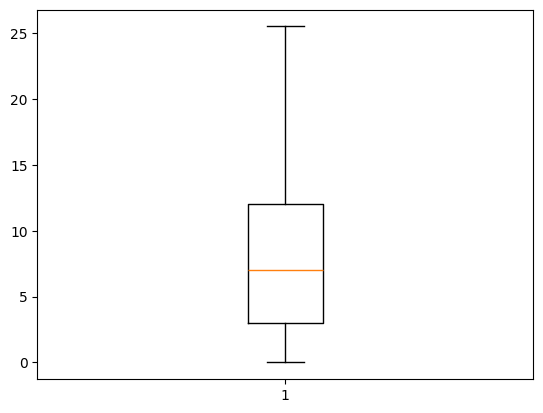

In [92]:
plt.boxplot(df["employ"])
plt.show()

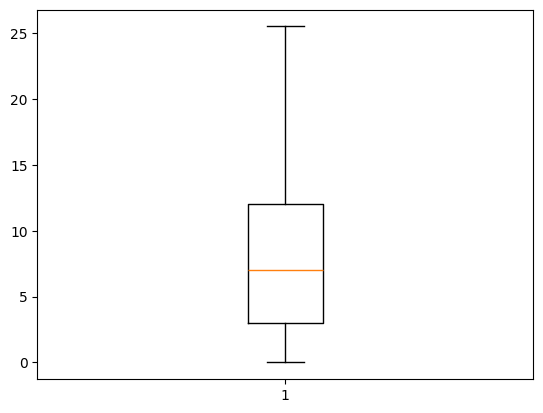

In [93]:
plt.boxplot(df["address"])
plt.show()

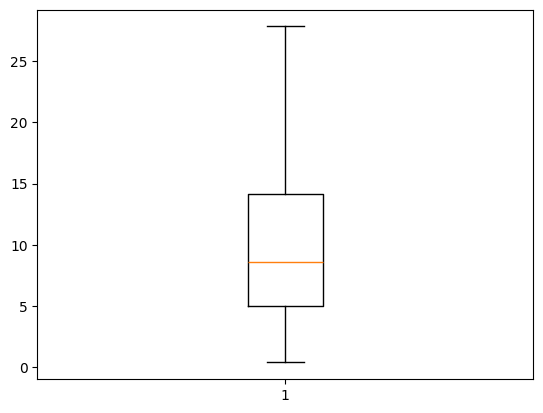

In [94]:
plt.boxplot(df["debtinc"])
plt.show()

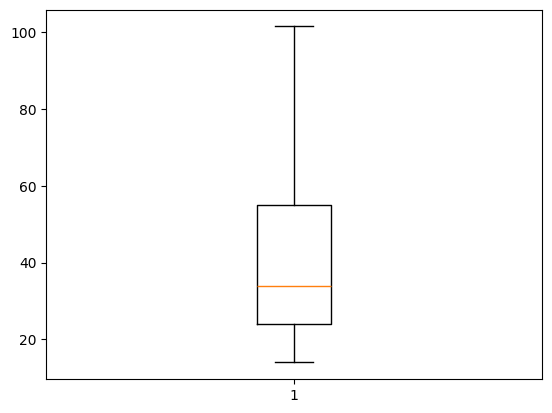

In [95]:
plt.boxplot(df["income"])
plt.show()

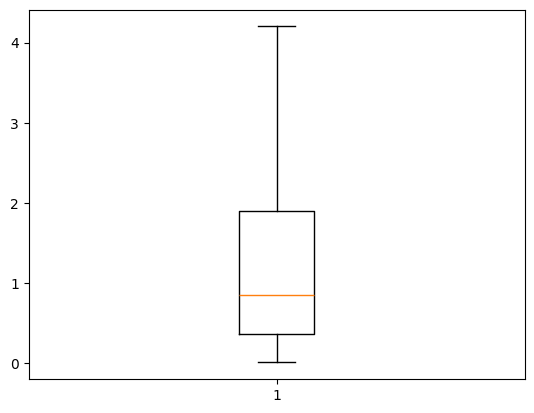

In [96]:
plt.boxplot(df["creddebt"])
plt.show()

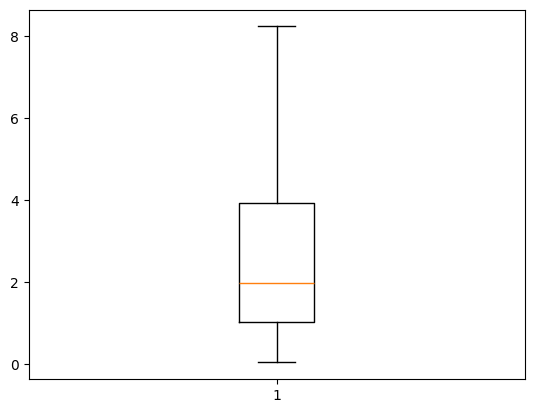

In [97]:
plt.boxplot(df["othdebt"])
plt.show()

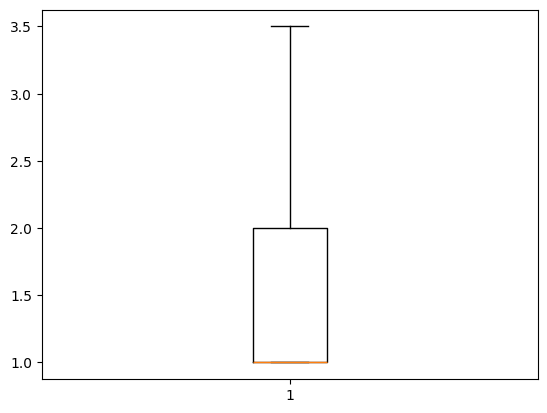

In [98]:
plt.boxplot(df["ed"])
plt.show()

In [99]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [100]:
X = df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]

y = df["default"]

In [106]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=1252)

In [107]:
log = LogisticRegression()

In [108]:
log.fit(X_train,y_train)

LogisticRegression()

In [109]:
print("Train accuracy" , log.score(X_train,y_train))
print("Test accuracy" , log.score(X_test,y_test))

# Difference between train and test accuracy should not be more than 5%

Train accuracy 0.8107142857142857
Test accuracy 0.7642857142857142


In [110]:
sample = data[data["default"].isnull()]
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,NaN
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,NaN
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,NaN
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,NaN
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [112]:
sample.drop(columns = "default",inplace=True)
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264
...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544


In [115]:
sample["pred_y"] = log.predict(sample)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- pred_y


In [116]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pred_y
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0.0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0.0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1.0
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0.0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0.0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0.0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0.0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0.0


In [118]:
from sklearn.metrics import classification_report

In [119]:
#classification_report(actual value,predicted))
print(classification_report(y_train,log.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       421
         1.0       0.70      0.42      0.52       139

    accuracy                           0.81       560
   macro avg       0.76      0.68      0.70       560
weighted avg       0.80      0.81      0.79       560



In [121]:
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85        96
         1.0       0.87      0.30      0.44        44

    accuracy                           0.76       140
   macro avg       0.81      0.64      0.65       140
weighted avg       0.79      0.76      0.72       140



In [127]:
# X_train Probability
prob_train = pd.DataFrame(log.predict_proba(X_train),columns=["prob_0","prob_1"])
prob_train

,prob_0,prob_1
0,0.907852,0.092148
1,0.912622,0.087378
2,0.997081,0.002919
3,0.447373,0.552627
4,0.264178,0.735822
...,...,...
555,0.629757,0.370243
556,0.894218,0.105782
557,0.963867,0.036133
558,0.500055,0.499945


In [128]:
copy = X_train.copy()

In [129]:
copy["pred_y"] = log.predict(copy)
copy

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pred_y
441,32.0,1.0,10.0,11.0,42.0,9.1,1.540266,2.281734,0.0
303,24.0,1.0,6.0,2.0,21.0,5.2,0.108108,0.983892,0.0
478,51.0,2.0,25.5,21.0,101.5,11.5,0.820870,8.240000,0.0
629,25.0,1.0,6.0,6.0,22.0,20.2,2.261996,2.182004,1.0
430,34.0,1.0,12.0,5.0,68.0,25.1,4.200000,8.240000,1.0
...,...,...,...,...,...,...,...,...,...
476,25.0,1.0,3.0,2.0,18.0,16.3,0.352080,2.581920,0.0
243,54.0,3.0,21.0,20.0,101.5,14.4,4.200000,7.391520,0.0
634,37.0,3.0,12.0,8.0,83.0,4.1,0.319882,3.083118,0.0
420,46.0,1.0,1.0,15.0,21.0,14.8,1.376844,1.731156,0.0


In [131]:
copy["mannual_y"] = np.where(prob_train["prob_1"]>0.5,1,0)
copy

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pred_y,mannual_y
441,32.0,1.0,10.0,11.0,42.0,9.1,1.540266,2.281734,0.0,0
303,24.0,1.0,6.0,2.0,21.0,5.2,0.108108,0.983892,0.0,0
478,51.0,2.0,25.5,21.0,101.5,11.5,0.820870,8.240000,0.0,0
629,25.0,1.0,6.0,6.0,22.0,20.2,2.261996,2.182004,1.0,1
430,34.0,1.0,12.0,5.0,68.0,25.1,4.200000,8.240000,1.0,1
...,...,...,...,...,...,...,...,...,...,...
476,25.0,1.0,3.0,2.0,18.0,16.3,0.352080,2.581920,0.0,0
243,54.0,3.0,21.0,20.0,101.5,14.4,4.200000,7.391520,0.0,0
634,37.0,3.0,12.0,8.0,83.0,4.1,0.319882,3.083118,0.0,0
420,46.0,1.0,1.0,15.0,21.0,14.8,1.376844,1.731156,0.0,0


In [132]:
actual = y_train
pre_y = np.where(prob_train["prob_1"]>=0.5,1,0)

In [135]:
print(classification_report(actual,pre_y))
print("------------------------------------------------------")
print(classification_report(y_train,log.predict(X_train)))                          ## recall  increase precision decrease this will be treated in descision tree

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       421
         1.0       0.70      0.42      0.52       139

    accuracy                           0.81       560
   macro avg       0.76      0.68      0.70       560
weighted avg       0.80      0.81      0.79       560

------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       421
         1.0       0.70      0.42      0.52       139

    accuracy                           0.81       560
   macro avg       0.76      0.68      0.70       560
weighted avg       0.80      0.81      0.79       560



In [139]:
prob_test = pd.DataFrame(log.predict_proba(X_test),columns=["prob_0","prob_1"])
prob_test

,prob_0,prob_1
0,0.992294,0.007706
1,0.767179,0.232821
2,0.635390,0.364610
3,0.636582,0.363418
4,0.826855,0.173145
...,...,...
135,0.224975,0.775025
136,0.786841,0.213159
137,0.309510,0.690490
138,0.912859,0.087141


In [140]:
copy_x = X_test.copy()
copy_x["pred_y"] = log.predict(copy_x)
copy_x

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pred_y
410,45.0,2.0,21.0,25.5,101.5,3.0,2.558160,1.401840,0.0
473,22.0,1.0,1.0,0.0,18.0,4.4,0.270072,0.521928,0.0
651,38.0,1.0,4.0,9.0,19.0,13.6,1.245488,1.338512,0.0
28,33.0,2.0,12.0,8.0,58.0,18.4,3.084208,7.587792,0.0
212,29.0,3.0,1.0,10.0,30.0,4.5,0.279450,1.070550,0.0
...,...,...,...,...,...,...,...,...,...
223,29.0,3.0,5.0,6.0,70.0,19.9,3.176040,8.240000,1.0
469,21.0,2.0,2.0,0.0,20.0,4.5,0.290700,0.609300,0.0
449,31.0,1.0,2.0,2.0,22.0,16.4,1.739056,1.868944,1.0
376,34.0,3.5,7.0,15.0,40.0,6.4,0.949760,1.610240,0.0


In [143]:
copy_x["mannual_test"] = np.where(prob_test["prob_1"]>0.5,1,0)
copy_x

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pred_y,mannual_test
410,45.0,2.0,21.0,25.5,101.5,3.0,2.558160,1.401840,0.0,0
473,22.0,1.0,1.0,0.0,18.0,4.4,0.270072,0.521928,0.0,0
651,38.0,1.0,4.0,9.0,19.0,13.6,1.245488,1.338512,0.0,0
28,33.0,2.0,12.0,8.0,58.0,18.4,3.084208,7.587792,0.0,0
212,29.0,3.0,1.0,10.0,30.0,4.5,0.279450,1.070550,0.0,0
...,...,...,...,...,...,...,...,...,...,...
223,29.0,3.0,5.0,6.0,70.0,19.9,3.176040,8.240000,1.0,1
469,21.0,2.0,2.0,0.0,20.0,4.5,0.290700,0.609300,0.0,0
449,31.0,1.0,2.0,2.0,22.0,16.4,1.739056,1.868944,1.0,1
376,34.0,3.5,7.0,15.0,40.0,6.4,0.949760,1.610240,0.0,0


In [183]:
act_test = y_test
pre_tst = np.where(prob_test["prob_1"]>=0.3,1,0)

In [184]:
print(classification_report(act_test,pre_tst))
print("------------------------------------------------------")
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82        96
         1.0       0.60      0.61      0.61        44

    accuracy                           0.75       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.75      0.75      0.75       140

------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85        96
         1.0       0.87      0.30      0.44        44

    accuracy                           0.76       140
   macro avg       0.81      0.64      0.65       140
weighted avg       0.79      0.76      0.72       140

